# Determine the location to set up Kaya Toast outlets in Singapore 


## Introduction

### Background

Singapore is a city-state in Southeast Asia. Founded as a British trading colony in 1819, since independence it has become one of the world's most prosperous, tax-friendly countries and boasts the world's busiest port. Combining the skyscrapers and subways of a modern, affluent city with a medley of Chinese, Malay and Indian influences along with a tropical climate, tasty food from hawker centres, copious shopping malls, and vibrant night-life scene, this Garden City makes a great stopover or springboard into the region.


![alt text](SingaporeBanner.jpg "Title")

The Mass Rapid Transit, abbreviated and referred to in local parlance as the MRT, is a metro network in Singapore, spanning most of the city-state's main island. 
![alt text](http://3.bp.blogspot.com/-m9o0hlFJRIc/U0yl-QHC9QI/AAAAAAAAASQ/ptvDSrplR9w/s1600/20131230050304!MRT_map_2017.png "MRT")


### Business problem

Kaya Toast is a very popular breakfast dish in Singapore. The store location is a critical factor contributing to the success of each store. 

In this project, we are creating a hypothetical scenario to help the business owners, who have just gotten their franchise for Kaya Toast, to determine the ideal location to open several Kaya Toast stores. The target customers are local residents who would like to have a quick simple breakfast, hence the stakeholders decided to open the new store in a location in close proximity to a MRT station as it is convenient for people to have breakfast in the morning.


![alt text](kaya-toast.png "Title")

The aim of this project is to identify the potential MRT stations where most frequent passengers are local residents in order to open the Kaya Toast outlets. We will explore and cluster the MRT stations in Singapore based on the most common places captured from Foursquare. We will study in details the area classification using Foursquare data and machine learning segmentation and clustering. 


## Data

In this project, we will analyze the following datasets:
- List of MRT stations in Singapore and their geospatial data. 

     This dataset was downloaded from https://data.world/hxchua/train-stations-in-singapore . 

     The file is also uploaded to my github for references (file name: `mrtsg.csv`).
     
    
- List of venues by categories around each MRT stations using Foursquare API.


 ## Methodology
 
In this study, we will follow the analysis approach:

1. Data collection
    - Retrieve the list of MRT station in Singapore
    - Using Foursquare API: retrieve the names, categories, latitude and longitude of top 100 venues within 500 meters radius from each MRT station


2. Data Processing
    - Check the numbers of unique categories from these venues
    - Group the venues by MRT stations and taking the mean on the frequency of visits of each venue category.
    

3. Clustering with K-means


4. Visualizing the clustering results 


5. Discussion: examining the characteristics of each cluster to identify the most potential cluster


 
 

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Data Collection

### List of MRT stations

Loading the dataset

In [433]:
df_mrt = pd.read_csv('mrtsg.csv')
print ('There are a total of {} MRT stations in Singapore' .format(df_mrt.shape[0]))

There are a total of 187 MRT stations in Singapore


A sample of the MRT dataset is given below:

In [434]:
df_mrt.head()

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,COLOR
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS


### Retrieve the list of MRT station in Singapore

#### Use geopy library to get the latitude and longitude values of Singapore City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent sg_explorer, as shown below.

In [5]:
address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
#location = geolocator.geocode(address)

latitude = 1.340863
longitude = 103.830391822121

#latitude = location.latitude
#longitude = location.longitude
print('The geograpical coordinate of Singapore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore City are 1.340863, 103.830391822121.


### Create a map of Singapore with MRT stations superimposed on top

In [437]:
neighborhoods = df_mrt 

neighborhoods = df_mrt.rename(columns={"COLOR": "MRT_line"})
neighborhoods

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,MRT_line
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS
5,153,BARTLEY MRT STATION,CC12,33168.3039,36108.7003,1.342828,103.879746,YELLOW
6,115,BAYFRONT MRT STATION,DT16,30867.0093,29368.6250,1.281874,103.859073,BLUE
7,115,BAYFRONT MRT STATION,CE1,30867.0093,29368.6250,1.281874,103.859073,OTHERS
8,140,BEAUTY WORLD MRT STATION,DT5,21598.1665,35931.2359,1.341223,103.775810,BLUE
9,37,BEDOK MRT STATION,EW5,38757.9520,34024.7048,1.323980,103.929959,GREEN


In [438]:
# create map of Toronto using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['MRT_line'], neighborhoods['STN_NAME']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### Define Foursquare Credentials and Version

In [284]:
CLIENT_ID = 'AUFFRJKVOJAJX3N5XOD0V2D1HM2Q5JSPWXEK0MNMR1V12AVN' # your Foursquare ID
CLIENT_SECRET = 'DM44B1ZJGLLJ3L51CIZQ0HZLITRBPIPIBR4BZU5V1L3XDPWZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AUFFRJKVOJAJX3N5XOD0V2D1HM2Q5JSPWXEK0MNMR1V12AVN
CLIENT_SECRET:DM44B1ZJGLLJ3L51CIZQ0HZLITRBPIPIBR4BZU5V1L3XDPWZ


Let's explore the first neighborhood in our dataframe.



In [285]:
downtown_data = neighborhoods
downtown_data.loc[0, 'STN_NAME']

neighborhood_latitude = downtown_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = downtown_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = downtown_data.loc[0, 'STN_NAME'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of ADMIRALTY MRT STATION are 1.4405850009999999, 103.80099820000001.


Now, let's get the top 100 venues that are in First Canadian Place within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [286]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [287]:
results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


### Explore Neighborhoods in Singapore

Create a function to repeat the same process to all the neighborhoods in Singapore

In [288]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['STN_NAME', 
                  'STN Latitude', 
                  'STN Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the above function on each neighborhood and create a new dataframe called `downtown_venues`

In [289]:
downtown_venues = getNearbyVenues(names=downtown_data['STN_NAME'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )



ADMIRALTY MRT STATION
ALJUNIED MRT STATION
ANG MO KIO MRT STATION
BAKAU LRT STATION
BANGKIT LRT STATION
BARTLEY MRT STATION
BAYFRONT MRT STATION
BAYFRONT MRT STATION
BEAUTY WORLD MRT STATION
BEDOK MRT STATION
BEDOK NORTH MRT STATION
BEDOK RESERVOIR MRT STATION
BENCOOLEN MRT STATION
BENDEMEER MRT STATION
BISHAN MRT STATION
BISHAN MRT STATION
BOON KENG MRT STATION
BOON LAY MRT STATION
BOTANIC GARDENS MRT STATION
BOTANIC GARDENS MRT STATION
BRADDELL MRT STATION
BRAS BASAH MRT STATION
BUANGKOK MRT STATION
BUGIS MRT STATION
BUGIS MRT STATION
BUKIT BATOK MRT STATION
BUKIT BROWN MRT STATION
BUKIT GOMBAK MRT STATION
BUKIT PANJANG LRT STATION
BUKIT PANJANG MRT STATION
BUONA VISTA MRT STATION
BUONA VISTA MRT STATION
CALDECOTT MRT STATION
CASHEW MRT STATION
CHANGI AIRPORT MRT STATION
CHENG LIM LRT STATION
CHINATOWN MRT STATION
CHINATOWN MRT STATION
CHINESE GARDEN MRT STATION
CHOA CHU KANG LRT STATION
CHOA CHU KANG MRT STATION
CITY HALL MRT STATION
CITY HALL MRT STATION
CLARKE QUAY MRT STATION
CLE

Let's check the size of the resulting dataframe

In [290]:
print(downtown_venues.shape)
downtown_venues.head()

(6784, 7)


,STN_NAME,STN Latitude,STN Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ADMIRALTY MRT STATION,1.440585,103.800998,Kampung Admiralty Hawker Centre,1.439939,103.800774,Food Court
1,ADMIRALTY MRT STATION,1.440585,103.800998,Starbucks,1.439761,103.800659,Coffee Shop
2,ADMIRALTY MRT STATION,1.440585,103.800998,NTUC Fairprice,1.439955,103.800761,Supermarket
3,ADMIRALTY MRT STATION,1.440585,103.800998,Maki-San,1.439940,103.801350,Sushi Restaurant
4,ADMIRALTY MRT STATION,1.440585,103.800998,Admiralty Street Soccer Court,1.438407,103.801300,Basketball Court


## Data Processing

Let's check how many venues were returned for each neighborhood

In [291]:
downtown_venues.groupby('STN_NAME').count()

,STN Latitude,STN Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
STN_NAME,,,,,,
ADMIRALTY MRT STATION,8,8,8,8,8,8
ALJUNIED MRT STATION,45,45,45,45,45,45
ANG MO KIO MRT STATION,40,40,40,40,40,40
BAKAU LRT STATION,13,13,13,13,13,13
BANGKIT LRT STATION,10,10,10,10,10,10
BARTLEY MRT STATION,8,8,8,8,8,8
BAYFRONT MRT STATION,104,104,104,104,104,104
BEAUTY WORLD MRT STATION,82,82,82,82,82,82
BEDOK MRT STATION,58,58,58,58,58,58


Number of uniques categories

In [292]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 329 uniques categories.


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

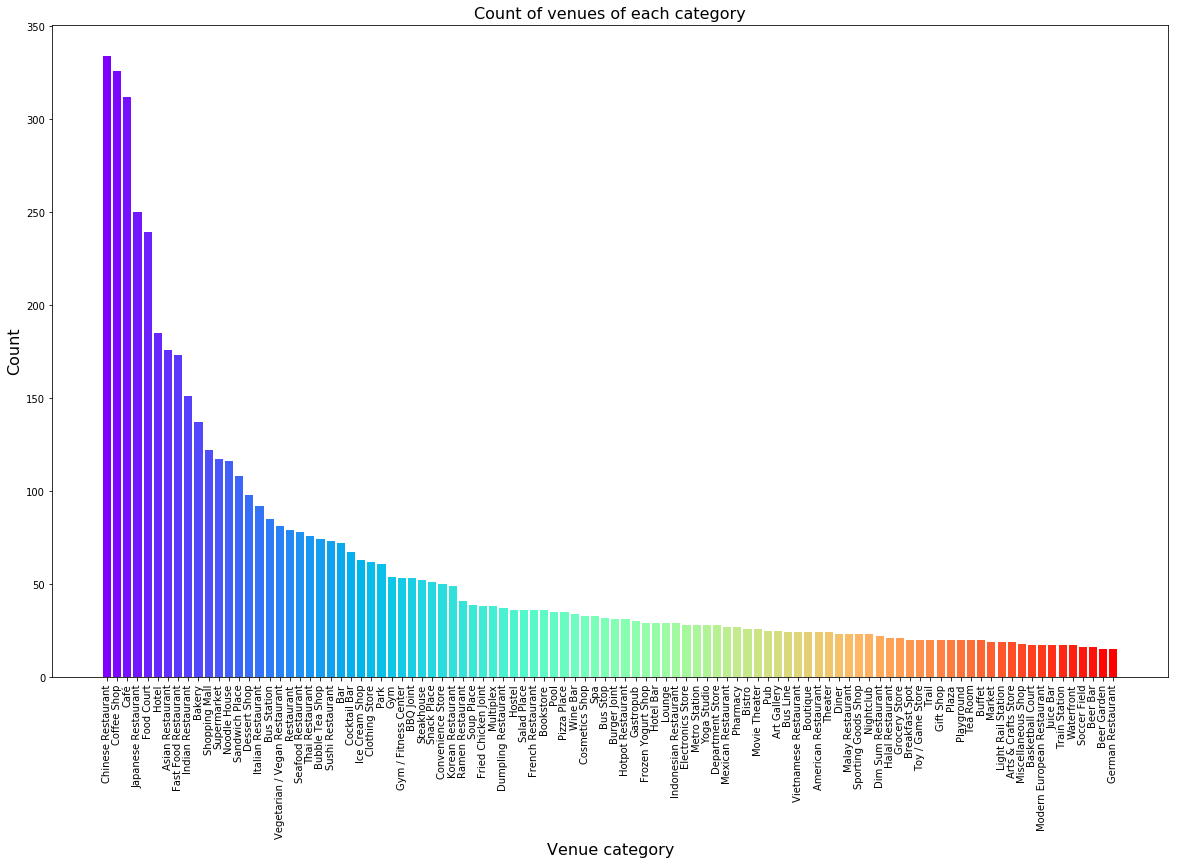

In [254]:
venue_distribution = downtown_venues['Venue Category'].value_counts().head(100)
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

plt

Transforming the dataset

In [293]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['STN_NAME'] = downtown_venues['STN_NAME'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_grouped = downtown_onehot.groupby('STN_NAME').mean().reset_index()
downtown_grouped.head()


,STN_NAME,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Canal,Candy Store,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Gym,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop,Food,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laundromat,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Sp

Print each neighborhood along with the top 5 most common venues

In [294]:
num_top_venues = 5

for hood in downtown_grouped['STN_NAME']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['STN_NAME'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ADMIRALTY MRT STATION----
               venue  freq
0        Supermarket  0.25
1  Convenience Store  0.25
2        Coffee Shop  0.12
3         Food Court  0.12
4   Basketball Court  0.12


----ALJUNIED MRT STATION----
                           venue  freq
0             Chinese Restaurant  0.16
1               Asian Restaurant  0.09
2                           Café  0.07
3  Vegetarian / Vegan Restaurant  0.07
4                   Noodle House  0.07


----ANG MO KIO MRT STATION----
                 venue  freq
0          Coffee Shop  0.12
1           Food Court  0.10
2         Dessert Shop  0.08
3  Japanese Restaurant  0.05
4          Supermarket  0.05


----BAKAU LRT STATION----
                  venue  freq
0            Food Stand  0.08
1      Sushi Restaurant  0.08
2  Fast Food Restaurant  0.08
3        Sandwich Place  0.08
4                 Trail  0.08


----BANGKIT LRT STATION----
                venue  freq
0          Food Court   0.2
1          Bike Trail   0.1
2             

                venue  freq
0  Chinese Restaurant  0.22
1         Coffee Shop  0.11
2        Noodle House  0.11
3        Intersection  0.06
4    Asian Restaurant  0.06


----EXPO MRT STATION----
                  venue  freq
0                  Café  0.09
1           Coffee Shop  0.09
2    Chinese Restaurant  0.06
3  Fast Food Restaurant  0.06
4   Japanese Restaurant  0.06


----FAJAR LRT STATION----
                  venue  freq
0  Fast Food Restaurant  0.25
1    Light Rail Station  0.25
2           Coffee Shop  0.25
3            Food Court  0.25
4     Accessories Store  0.00


----FARMWAY LRT STATION----
                  venue  freq
0           Supermarket   0.1
1          Hockey Arena   0.1
2                Bistro   0.1
3                   Gym   0.1
4  Gym / Fitness Center   0.1


----FARRER PARK MRT STATION----
                venue  freq
0   Indian Restaurant  0.21
1                Café  0.13
2  Chinese Restaurant  0.09
3               Hotel  0.06
4    Asian Restaurant  0.04


---

                           venue  freq
0                     Food Court  0.15
1  Vegetarian / Vegan Restaurant  0.15
2               Asian Restaurant  0.10
3                    Bus Station  0.10
4                       Bus Line  0.05


----MERIDIAN LRT STATION----
                venue  freq
0              Casino   0.5
1  Chinese Restaurant   0.5
2   Other Repair Shop   0.0
3         Pastry Shop   0.0
4                Park   0.0


----MOUNTBATTEN MRT STATION----
                  venue  freq
0          Noodle House  0.18
1    Chinese Restaurant  0.07
2            Food Court  0.07
3          Dessert Shop  0.05
4  Fast Food Restaurant  0.05


----NEWTON MRT STATION----
                venue  freq
0  Chinese Restaurant  0.20
1  Seafood Restaurant  0.09
2  Italian Restaurant  0.07
3           Hotel Bar  0.07
4    Asian Restaurant  0.04


----NIBONG LRT STATION----
                venue  freq
0                 Bar  0.12
1        Soccer Field  0.12
2          Steakhouse  0.06
3  Light Rail S

            venue  freq
0         Stadium  0.06
1            Café  0.06
2     Supermarket  0.04
3     Coffee Shop  0.04
4  Clothing Store  0.04


----STEVENS MRT STATION----
                  venue  freq
0                 Diner  0.25
1    Italian Restaurant  0.25
2  Fast Food Restaurant  0.12
3   Japanese Restaurant  0.12
4                  Café  0.12


----SUMANG LRT STATION----
                  venue  freq
0        Ice Cream Shop  0.06
1  Fast Food Restaurant  0.06
2                  Café  0.06
3            Food Court  0.06
4    Chinese Restaurant  0.06


----TAI SENG MRT STATION----
                venue  freq
0  Chinese Restaurant  0.11
1          Food Court  0.09
2  Seafood Restaurant  0.09
3                Café  0.07
4         Coffee Shop  0.07


----TAMPINES EAST MRT STATION----
                     venue  freq
0              Coffee Shop  0.20
1         Department Store  0.13
2              Supermarket  0.07
3  South Indian Restaurant  0.07
4     Fast Food Restaurant  0.07


--

In [295]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['STN_NAME']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['STN_NAME'] = downtown_grouped['STN_NAME']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,STN_NAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADMIRALTY MRT STATION,Convenience Store,Supermarket,Sushi Restaurant,Coffee Shop,Food Court,Basketball Court,Yoga Studio,Fishing Spot,Farm,Farmers Market
1,ALJUNIED MRT STATION,Chinese Restaurant,Asian Restaurant,Café,Noodle House,Vegetarian / Vegan Restaurant,Coffee Shop,Food Court,Seafood Restaurant,Dim Sum Restaurant,Badminton Court
2,ANG MO KIO MRT STATION,Coffee Shop,Food Court,Dessert Shop,Supermarket,Bubble Tea Shop,Japanese Restaurant,Sushi Restaurant,Multiplex,Sandwich Place,Malay Restaurant
3,BAKAU LRT STATION,Convenience Store,Japanese Restaurant,Supermarket,Sushi Restaurant,Fast Food Restaurant,Bus Station,Shopping Mall,Sandwich Place,Trail,Dessert Shop
4,BANGKIT LRT STATION,Food Court,Bus Line,Park,Market,Miscellaneous Shop,Coffee Shop,Pharmacy,Bike Trail,Noodle House,Yoga Studio


## Clustering with K-means

Run k-means to cluster the neighborhood into 5 clusters.

In [296]:
# set number of clusters
kclusters = 7

downtown_grouped_clustering = downtown_grouped.drop('STN_NAME', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('STN_NAME'), on='STN_NAME')

downtown_merged.head() # check the last columns!

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,MRT_line,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED,4,Convenience Store,Supermarket,Sushi Restaurant,Coffee Shop,Food Court,Basketball Court,Yoga Studio,Fishing Spot,Farm,Farmers Market
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN,1,Chinese Restaurant,Asian Restaurant,Café,Noodle House,Vegetarian / Vegan Restaurant,Coffee Shop,Food Court,Seafood Restaurant,Dim Sum Restaurant,Badminton Court
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED,4,Coffee Shop,Food Court,Dessert Shop,Supermarket,Bubble Tea Shop,Japanese Restaurant,Sushi Restaurant,Multiplex,Sandwich Place,Malay Restaurant
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS,5,Convenience Store,Japanese Restaurant,Supermarket,Sushi Restaurant,Fast Food Restaurant,Bus Station,Shopping Mall,Sandwich Place,Trail,Dessert Shop
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS,4,Food Court,Bus Line,Park,Market,Miscellaneous Shop,Coffee Shop,Pharmacy,Bike Trail,Noodle House,Yoga Studio


In [368]:

final_cluster = downtown_merged.replace({2:0, 3: 0,6:0})
final_cluster.groupby(['Cluster Labels']).count()
final_cluster


,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,MRT_line,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED,4,Convenience Store,Supermarket,Sushi Restaurant,Coffee Shop,Food Court,Basketball Court,Yoga Studio,Fishing Spot,Farm,Farmers Market
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN,1,Chinese Restaurant,Asian Restaurant,Café,Noodle House,Vegetarian / Vegan Restaurant,Coffee Shop,Food Court,Seafood Restaurant,Dim Sum Restaurant,Badminton Court
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED,4,Coffee Shop,Food Court,Dessert Shop,Supermarket,Bubble Tea Shop,Japanese Restaurant,Sushi Restaurant,Multiplex,Sandwich Place,Malay Restaurant
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS,5,Convenience Store,Japanese Restaurant,Supermarket,Sushi Restaurant,Fast Food Restaurant,Bus Station,Shopping Mall,Sandwich Place,Trail,Dessert Shop
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS,4,Food Court,Bus Line,Park,Market,Miscellaneous Shop,Coffee Shop,Pharmacy,Bike Trail,Noodle House,Yoga Studio
5,153,BARTLEY MRT STATION,CC12,33168.3039,36108.7003,1.342828,103.879746,YELLOW,1,Bus Station,Noodle House,Pet Store,Metro Station,Café,Bus Stop,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
6,115,BAYFRONT MRT STATION,DT16,30867.0093,29368.6250,1.281874,103.859073,BLUE,5,Hotel,Boutique,Theater,Casino,Roof Deck,Bar,Noodle House,Waterfront,Bridge,Tea Room
7,115,BAYFRONT MRT STATION,CE1,30867.0093,29368.6250,1.281874,103.859073,OTHERS,5,Hotel,Boutique,Theater,Casino,Roof Deck,Bar,Noodle House,Waterfront,Bridge,Tea Room
8,140,BEAUTY WORLD MRT STATION,DT5,21598.1665,35931.2359,1.341223,103.775810,BLUE,1,Chinese Restaurant,Korean Restaurant,Café,Asian Restaurant,Food Court,Dessert Shop,Thai Restaurant,Pizza Place,Hainan Restaurant,Dim Sum Restaurant
9,37,BEDOK MRT STATION,EW5,38757.9520,34024.7048,1.323980,103.929959,GREEN,5,Chinese Restaurant,Coffee Shop,Food Court,Asian Restaurant,Japanese Restaurant,Sandwich Place,Dessert Shop,Supermarket,Fast Food Restaurant,French Restaurant


,STN_NAME,Cluster Labels,Latitude,Longitude
0,ADMIRALTY MRT STATION,4,1.440585,103.800998
1,ALJUNIED MRT STATION,1,1.316433,103.882893
2,ANG MO KIO MRT STATION,4,1.369933,103.849553
3,BAKAU LRT STATION,5,1.388093,103.905418
4,BANGKIT LRT STATION,4,1.380018,103.772667
5,BARTLEY MRT STATION,1,1.342828,103.879746
6,BAYFRONT MRT STATION,5,1.281874,103.859073
7,BAYFRONT MRT STATION,5,1.281874,103.859073
8,BEAUTY WORLD MRT STATION,1,1.341223,103.775810
9,BEDOK MRT STATION,5,1.323980,103.929959


### Foursquare API

## Results and visualization



 Visualize the resulting clusters

In [369]:
kclusters = 5
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_cluster['Latitude'], final_cluster['Longitude'], final_cluster['STN_NAME'], final_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

AttributeError: 'numpy.ndarray' object has no attribute 'rgb2hex'

## Discussion

#### Cluster 1: Park

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

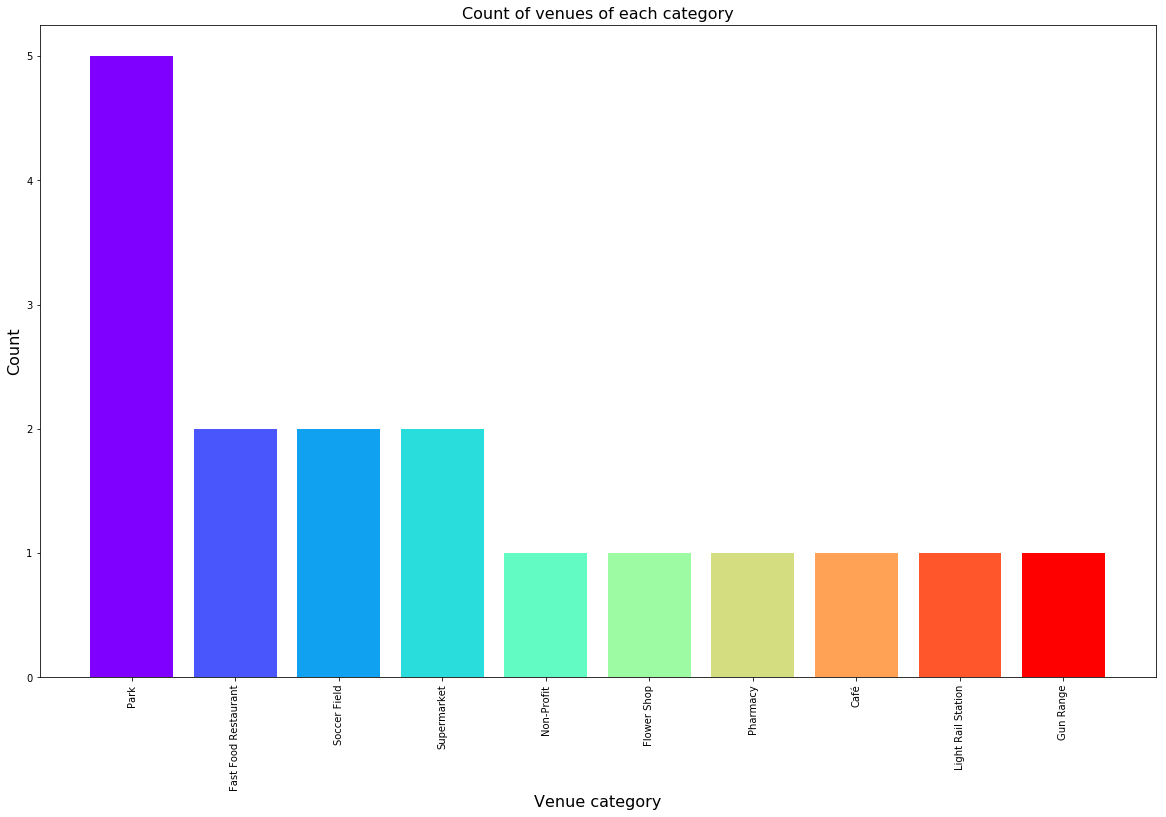

In [379]:

MRT_cluster1 = final_cluster.loc[final_cluster['Cluster Labels'] == 0, final_cluster.columns[[1] + list(range(5, final_cluster.shape[1]))]]

MRT_dist1 = MRT_cluster1[['STN_NAME','Cluster Labels']]
venue_dist1 = pd.merge (MRT_dist1, downtown_venues, on='STN_NAME')

venue_distribution = venue_dist1['Venue Category'].value_counts().head(10)
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

plt

#### Cluster 2: Chinese Restaurant

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

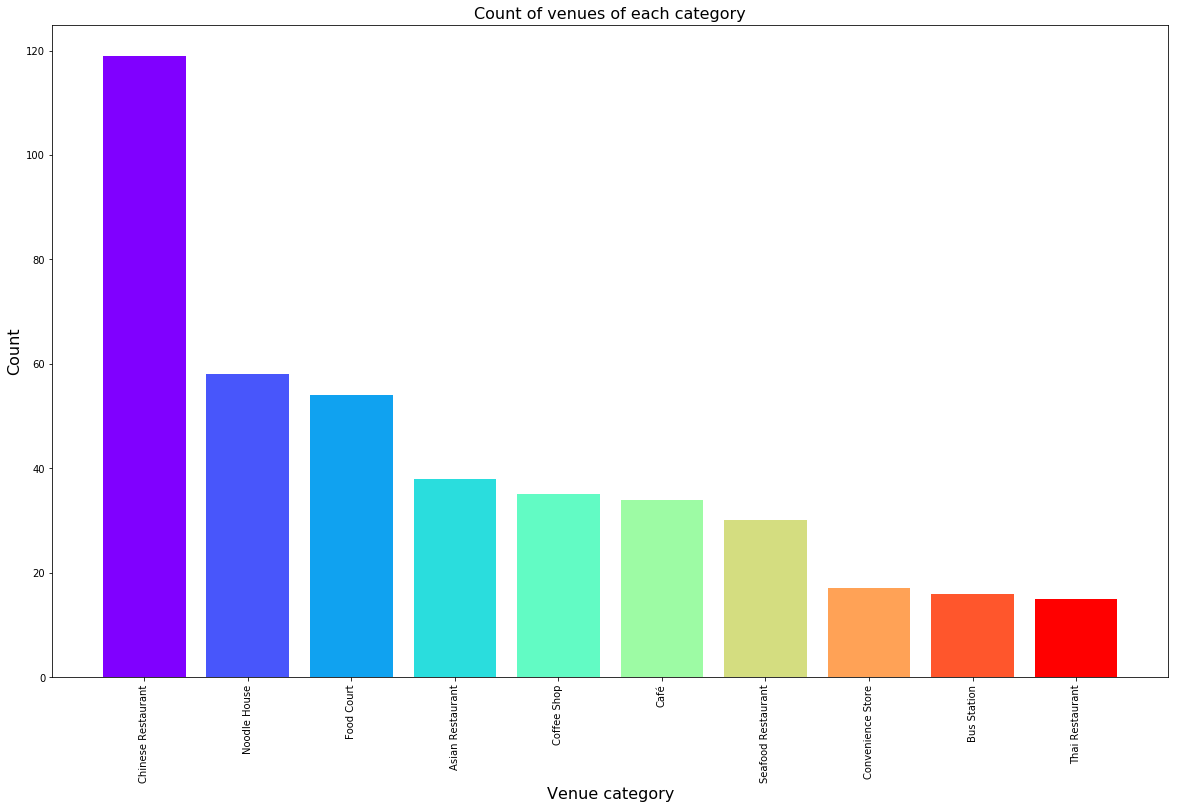

In [374]:

MRT_cluster2 = final_cluster.loc[final_cluster['Cluster Labels'] ==1, final_cluster.columns[[1] + list(range(5, final_cluster.shape[1]))]]

MRT_dist2 = MRT_cluster2[['STN_NAME','Cluster Labels']]
venue_dist2 = pd.merge (MRT_dist2, downtown_venues, on='STN_NAME')

venue_distribution = venue_dist2['Venue Category'].value_counts().head(10)
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

plt

#### Cluster 3: Residential 


Most frequent venues are those that most local residents frequently visit, such as: coffee shop, food court, fast food restaurant, bus station, supermarket, etc.

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

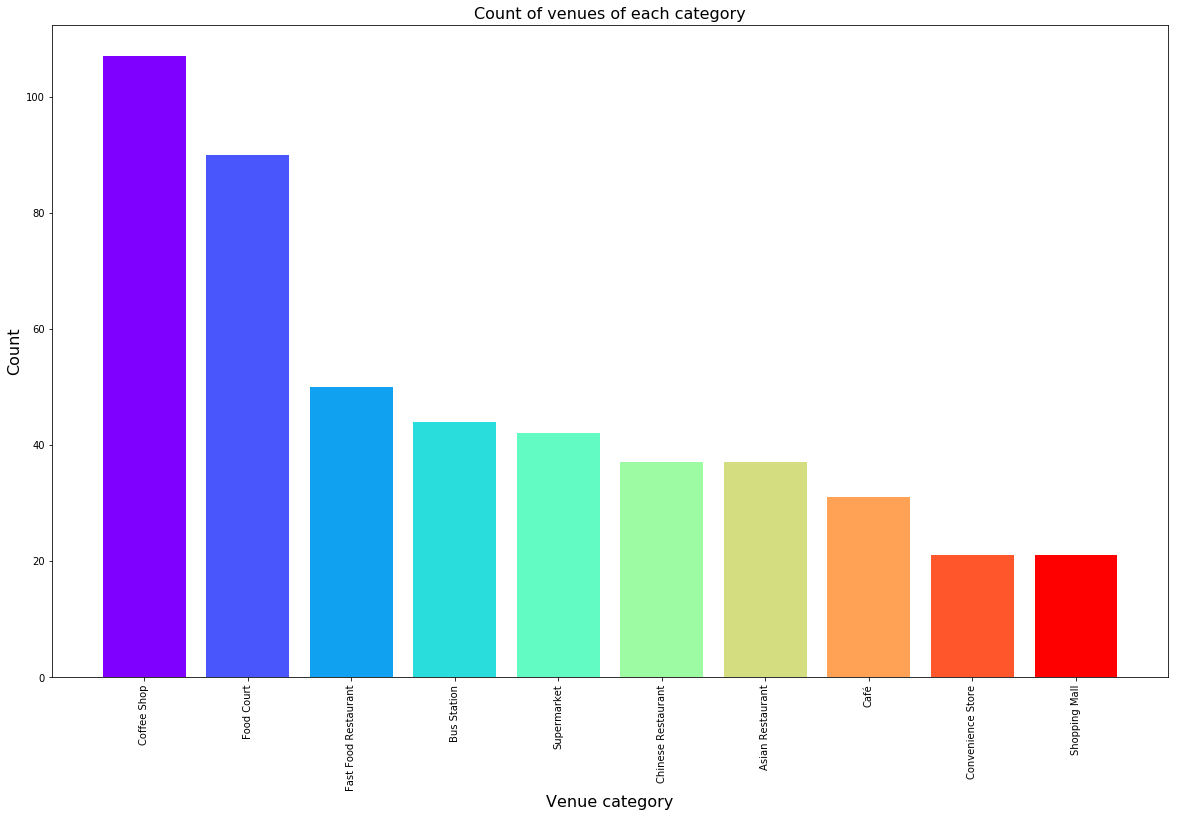

In [375]:

MRT_cluster3 = final_cluster.loc[final_cluster['Cluster Labels'] ==4, final_cluster.columns[[1] + list(range(5, final_cluster.shape[1]))]]

MRT_dist3 = MRT_cluster3[['STN_NAME','Cluster Labels']]
venue_dist3 = pd.merge (MRT_dist3, downtown_venues, on='STN_NAME')

venue_distribution = venue_dist3['Venue Category'].value_counts().head(10)
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

plt


#### Cluster 4: Cafe & Hotel

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

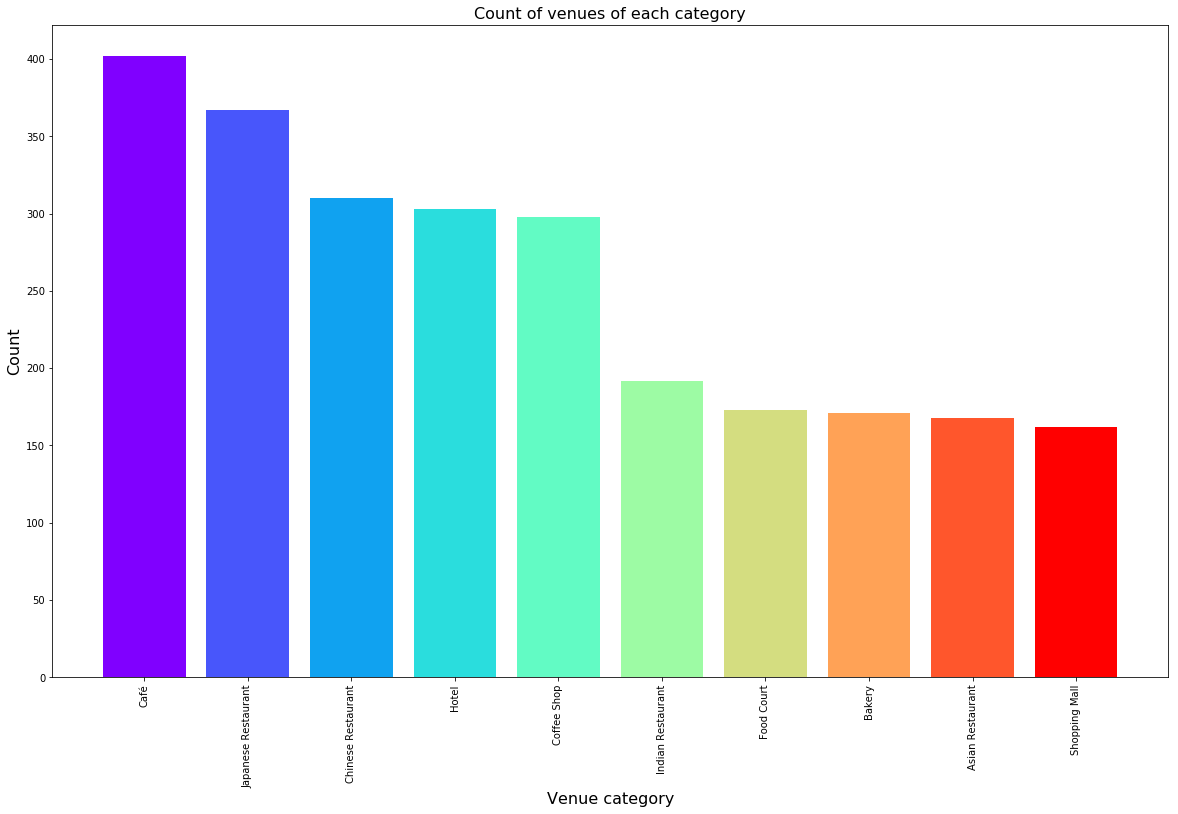

In [376]:

MRT_cluster4 = final_cluster.loc[final_cluster['Cluster Labels'] ==5, final_cluster.columns[[1] + list(range(5, final_cluster.shape[1]))]]

MRT_dist4 = MRT_cluster4[['STN_NAME','Cluster Labels']]
venue_dist4 = pd.merge (MRT_dist4, downtown_venues, on='STN_NAME')

venue_distribution = venue_dist4['Venue Category'].value_counts().head(10)
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

plt



In [412]:
shortlist = pd.DataFrame(MRT_cluster3[['STN_NAME']].groupby(['STN_NAME']).count())
shortlist.shape[0]

52

## Conclusion

In this study, we aim to identify the potential MRT stations in Singapore where most frequent passengers are local residents in order to open the Kaya Toast outlets. The analysis approach is segmenting the MRT stations through clustering technique based on analyzing the most frequent venues near to MRT stations.

From the clustering results, we have identified a segment where the most frequent venues are those that most local residents frequently visit, such as: coffee shop, food court, fast food restaurant, bus station, supermarket, etc. This segment consists 52 MRT stations (shortlisted from the initial list of total 187 MRT stations in Singapore) to open the Kaya toast outlets. 

The business owners can use the result of our analysis as a baseline to proceed with the next steps, which are to find the rental price and the availability of rental venues at these 52 shortlisted MRT stations.
